In [2]:
import pandas as pd

data=pd.read_csv('merged_data_1951_2021.csv')
# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract year, month, and day from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

# Verify changes
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25933 entries, 0 to 25932
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    25933 non-null  datetime64[ns]
 1   lon     25933 non-null  int64         
 2   lat     25933 non-null  float64       
 3   temp    25931 non-null  float64       
 4   year    25933 non-null  int32         
 5   month   25933 non-null  int32         
 6   day     25933 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1)
memory usage: 1.1 MB
None
        time  lon   lat       temp  year  month  day
0 1951-01-01   83  25.5  22.980000  1951      1    1
1 1951-01-02   83  25.5  21.580000  1951      1    2
2 1951-01-03   83  25.5  21.510000  1951      1    3
3 1951-01-04   83  25.5  21.410000  1951      1    4
4 1951-01-05   83  25.5  22.889999  1951      1    5


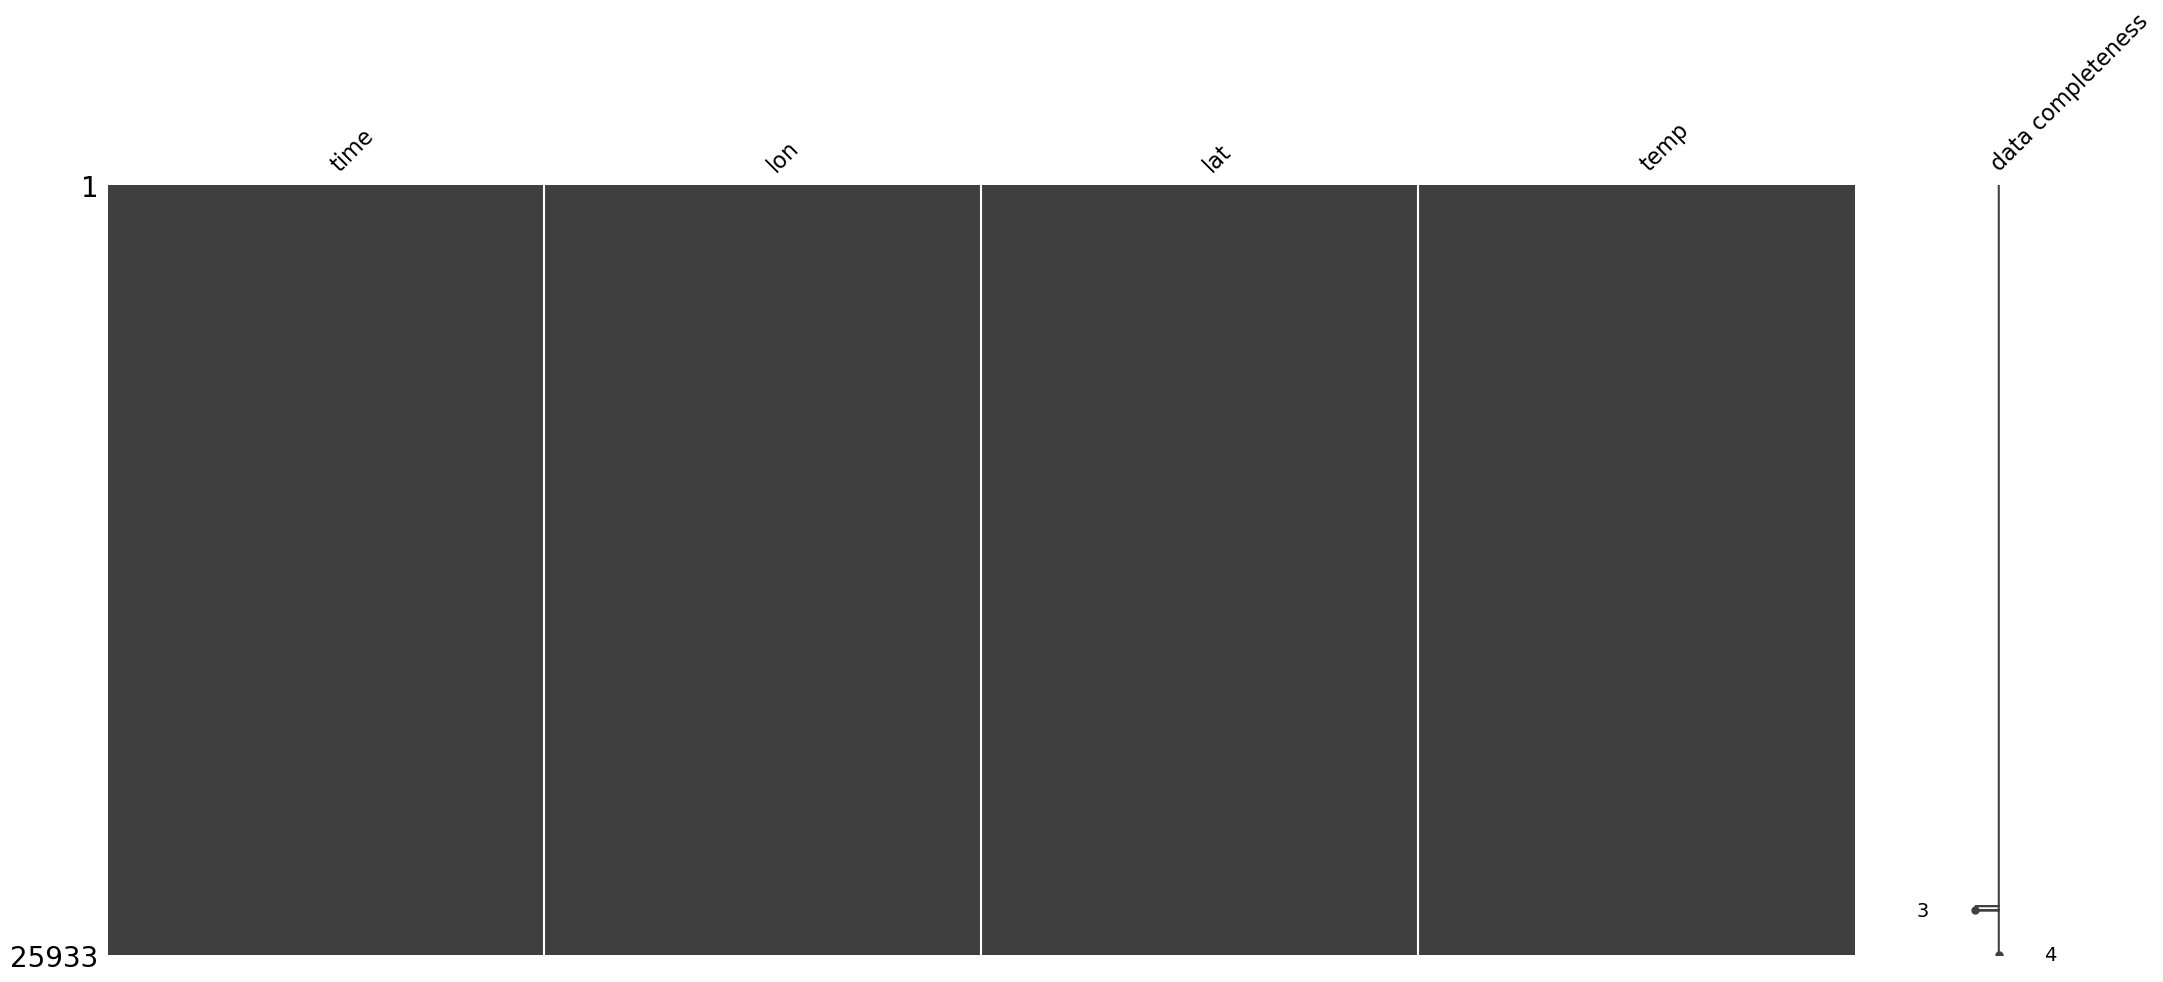

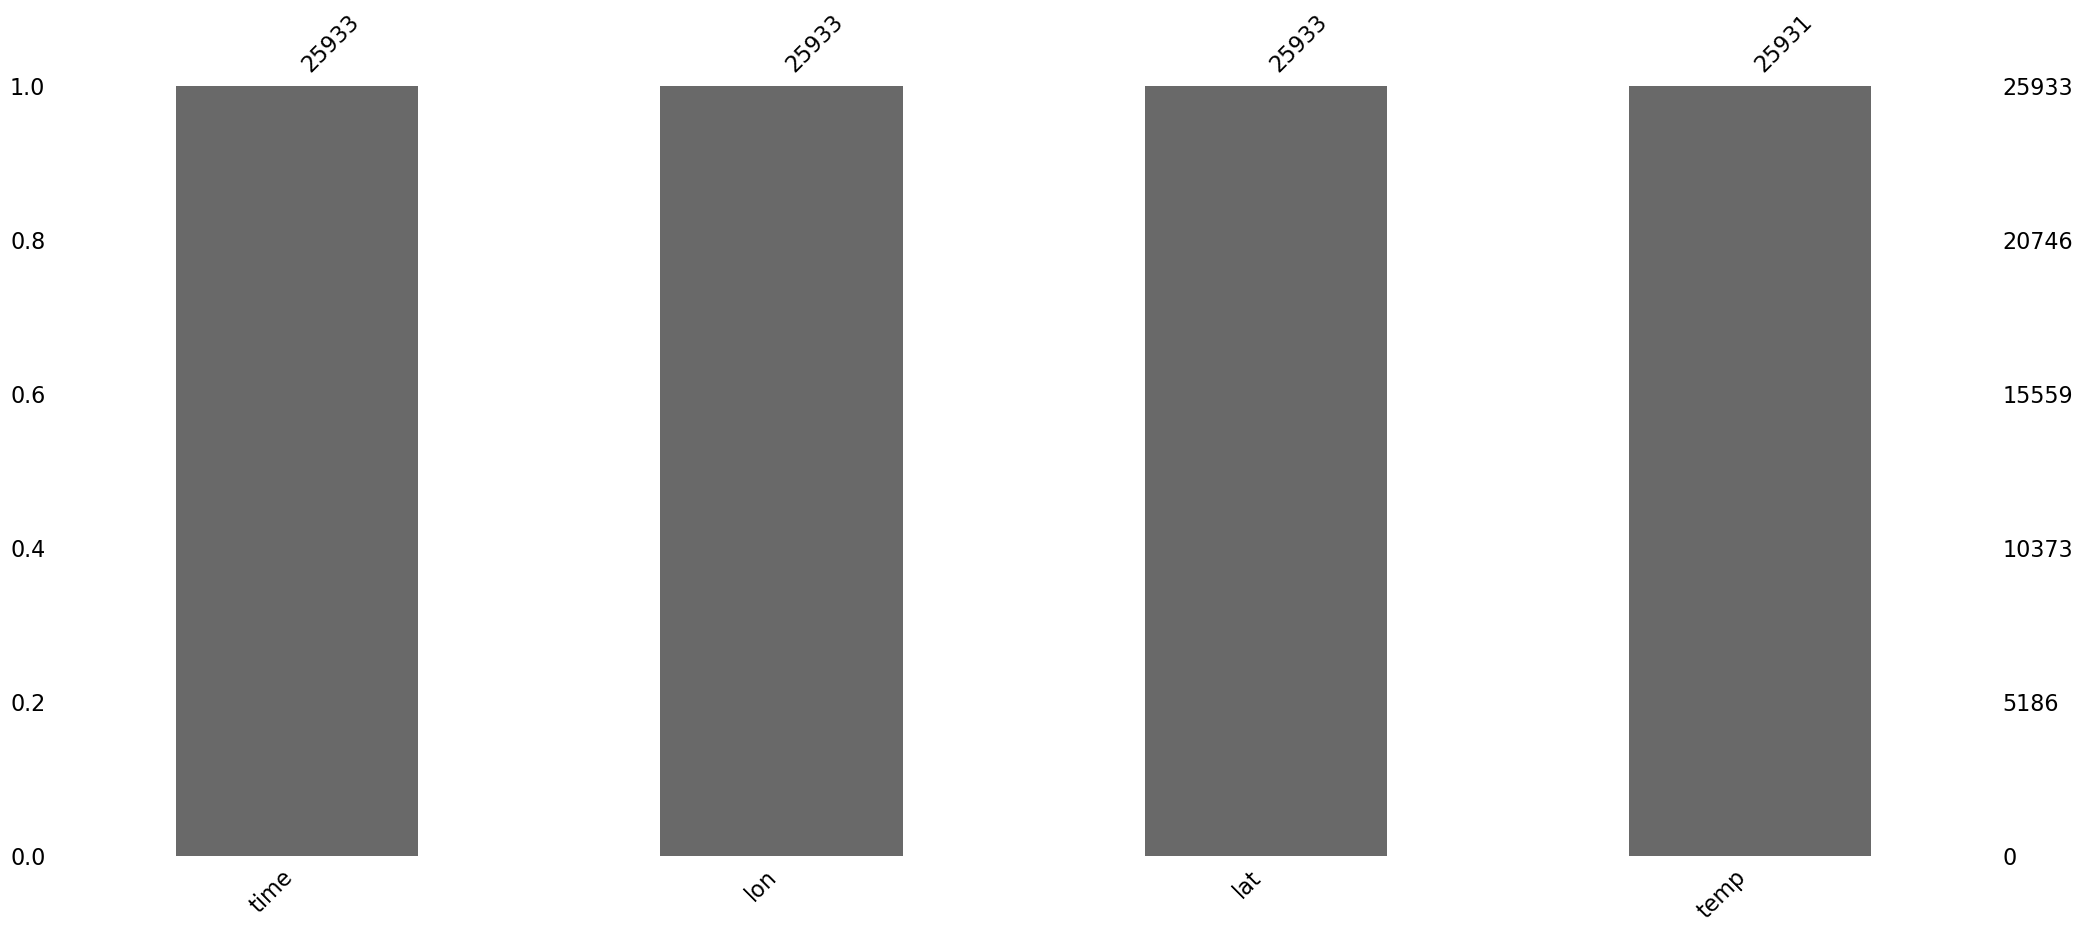

In [26]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a missing data matrix
msno.matrix(df, labels=True)
plt.show()

# Create a missing data bar plot
msno.bar(df)
plt.show()

# Create a missing data heatmap
#msno.heatmap(df)
#plt.show()

# Optional: Create a dendrogram to see the clustering of missing data
#msno.dendrogram(df)
#plt.show()

In [3]:
# Define regions based on latitude and longitude
def define_region(row):
    if row['lat'] >= 0 and row['lon'] < 0:
        return 'North-West'
    elif row['lat'] >= 0 and row['lon'] >= 0:
        return 'North-East'
    elif row['lat'] < 0 and row['lon'] < 0:
        return 'South-West'
    else:
        return 'South-East'

# Apply the function to create a new 'region' column
data['region'] = data.apply(define_region, axis=1)

# Check the unique regions
unique_regions = data['region'].unique()
print("Unique regions in the dataset:", unique_regions)


Unique regions in the dataset: ['North-East']


In [4]:
# Calculate yearly average temperatures for each region
regional_yearly_avg_temp = data.groupby(['year', 'region'])['temp'].mean().unstack()

# Verify changes
print(regional_yearly_avg_temp.head())


region  North-East
year              
1951     32.179808
1952     32.057240
1953     31.821096
1954     31.613562
1955     31.552438


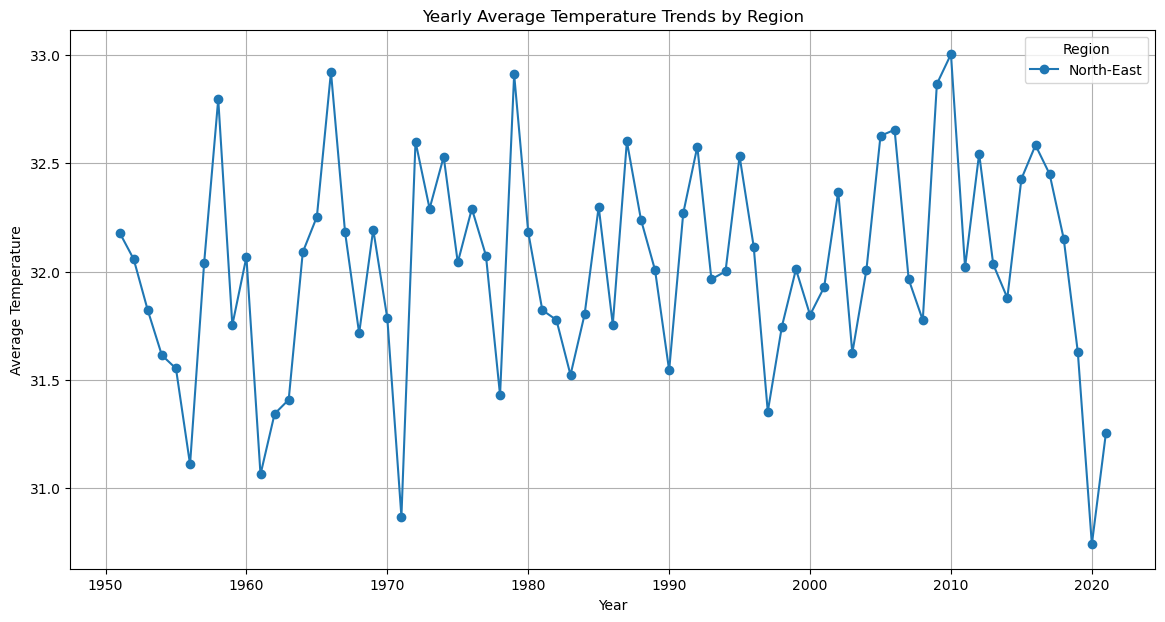

In [5]:
import matplotlib.pyplot as plt

# Plotting the temperature trends for each region
plt.figure(figsize=(14, 7))
for region in regional_yearly_avg_temp.columns:
    plt.plot(regional_yearly_avg_temp.index, regional_yearly_avg_temp[region], marker='o', linestyle='-', label=region)

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Average Temperature Trends by Region')
plt.legend(title='Region')
plt.grid(True)
plt.show()


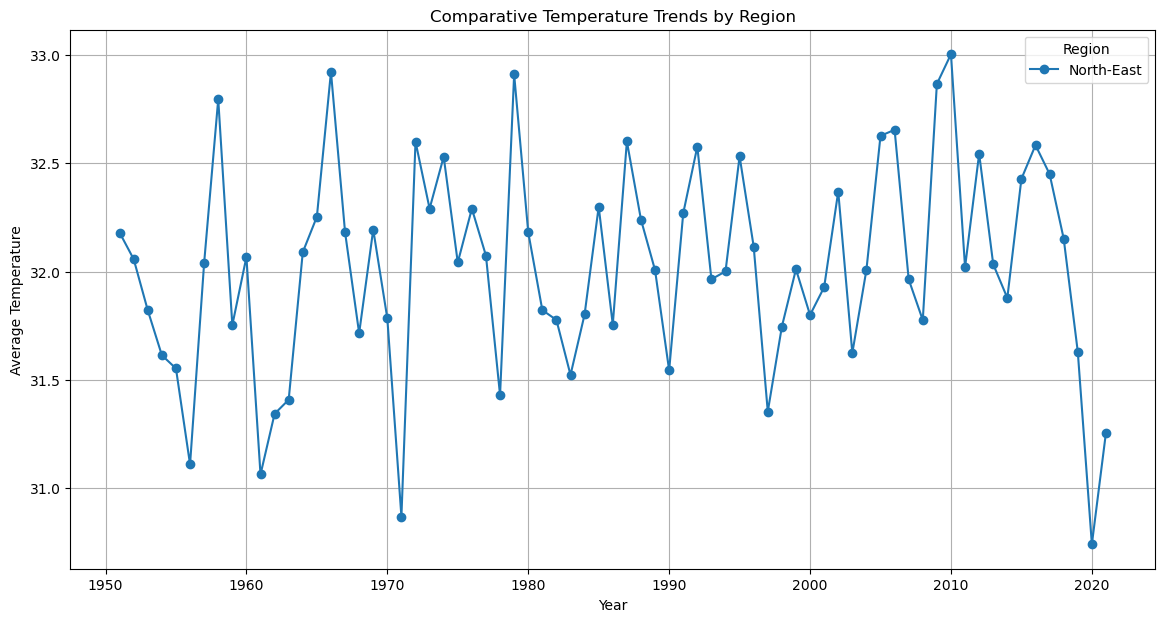

In [6]:
# Plotting comparative temperature trends for regions
plt.figure(figsize=(14, 7))
for region in regional_yearly_avg_temp.columns:
    plt.plot(regional_yearly_avg_temp.index, regional_yearly_avg_temp[region], marker='o', linestyle='-', label=region)

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Comparative Temperature Trends by Region')
plt.legend(title='Region')
plt.grid(True)
plt.show()


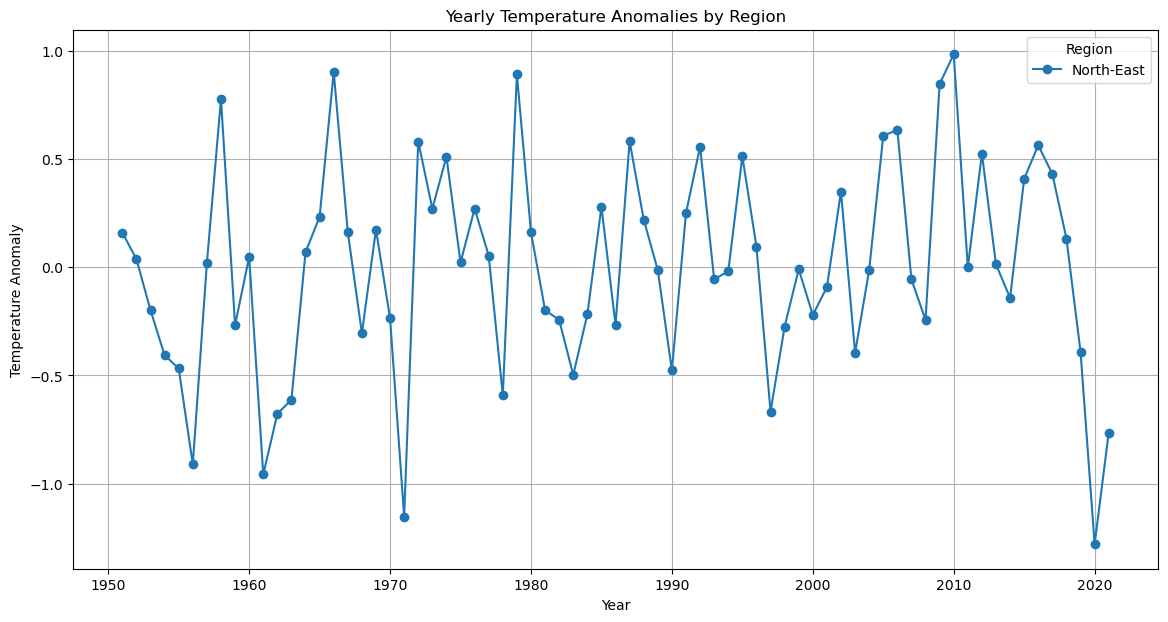

In [7]:
# Calculate the long-term average temperature for each region
long_term_avg_temp = data.groupby('region')['temp'].mean()

# Calculate temperature anomalies for each region
data['anomaly'] = data.apply(lambda row: row['temp'] - long_term_avg_temp[row['region']], axis=1)

# Calculate yearly average anomalies for each region
regional_yearly_avg_anomalies = data.groupby(['year', 'region'])['anomaly'].mean().unstack()

# Plotting temperature anomalies for each region
plt.figure(figsize=(14, 7))
for region in regional_yearly_avg_anomalies.columns:
    plt.plot(regional_yearly_avg_anomalies.index, regional_yearly_avg_anomalies[region], marker='o', linestyle='-', label=region)

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Yearly Temperature Anomalies by Region')
plt.legend(title='Region')
plt.grid(True)
plt.show()


In [15]:
import pandas as pd

df=pd.read_csv('merged_data_1951_2021.csv')

# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract year, month, and day from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

# Define regions based on latitude and longitude
def define_region(row):
    if row['lat'] >= 0 and row['lon'] < 0:
        return 'North-West'
    elif row['lat'] >= 0 and row['lon'] >= 0:
        return 'North-East'
    elif row['lat'] < 0 and row['lon'] < 0:
        return 'South-West'
    else:
        return 'South-East'

# Apply the function to create a new 'region' column
data['region'] = data.apply(define_region, axis=1)

# Define seasons based on month
def define_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new 'season' column
data['season'] = data['month'].apply(define_season)

# Verify changes
print(data.head())


        time  lon   lat       temp  year  month  day      region    anomaly  \
0 1951-01-01   83  25.5  22.980000  1951      1    1  North-East  -9.040069   
1 1951-01-02   83  25.5  21.580000  1951      1    2  North-East -10.440069   
2 1951-01-03   83  25.5  21.510000  1951      1    3  North-East -10.510068   
3 1951-01-04   83  25.5  21.410000  1951      1    4  North-East -10.610069   
4 1951-01-05   83  25.5  22.889999  1951      1    5  North-East  -9.130069   

   season  
0  Winter  
1  Winter  
2  Winter  
3  Winter  
4  Winter  


In [16]:
# Calculate seasonal average temperatures for each region
seasonal_avg_temp = data.groupby(['year', 'season', 'region'])['temp'].mean().reset_index()

# Verify changes
print(seasonal_avg_temp.head())


   year  season      region       temp
0  1951    Fall  North-East  32.382967
1  1951  Spring  North-East  36.613261
2  1951  Summer  North-East  34.883478
3  1951  Winter  North-East  24.678667
4  1952    Fall  North-East  31.682198


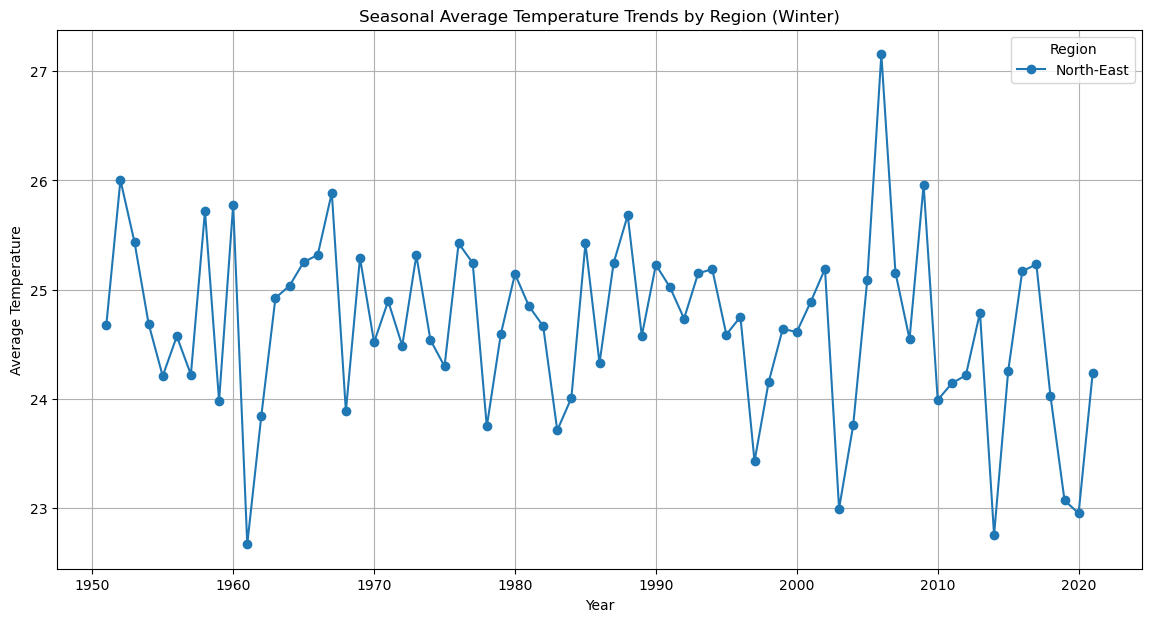

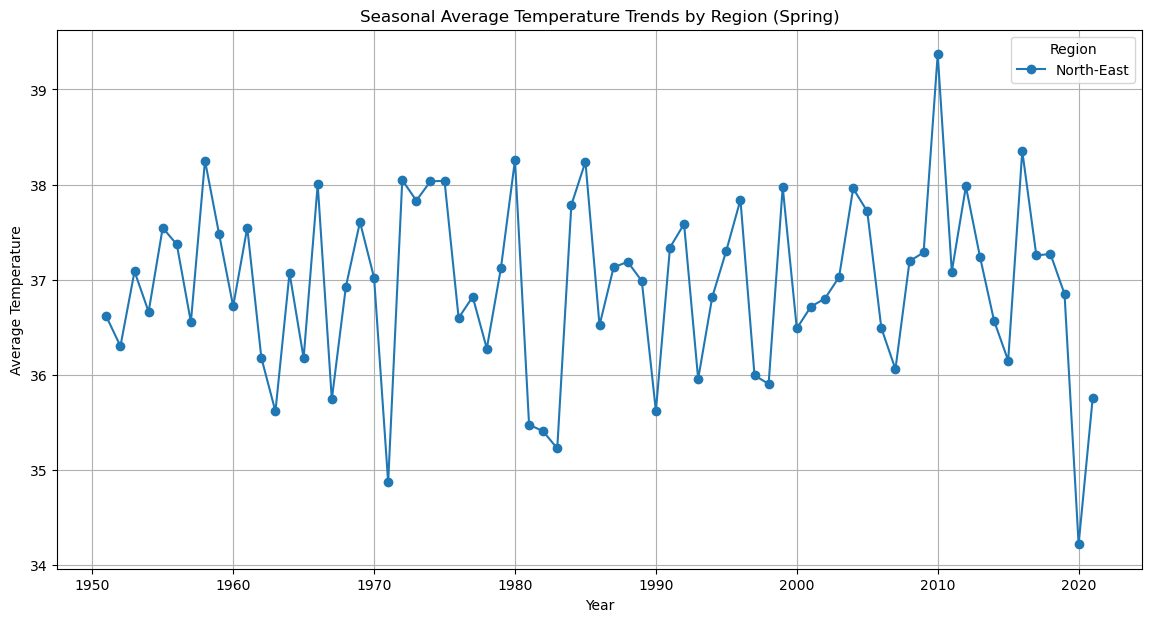

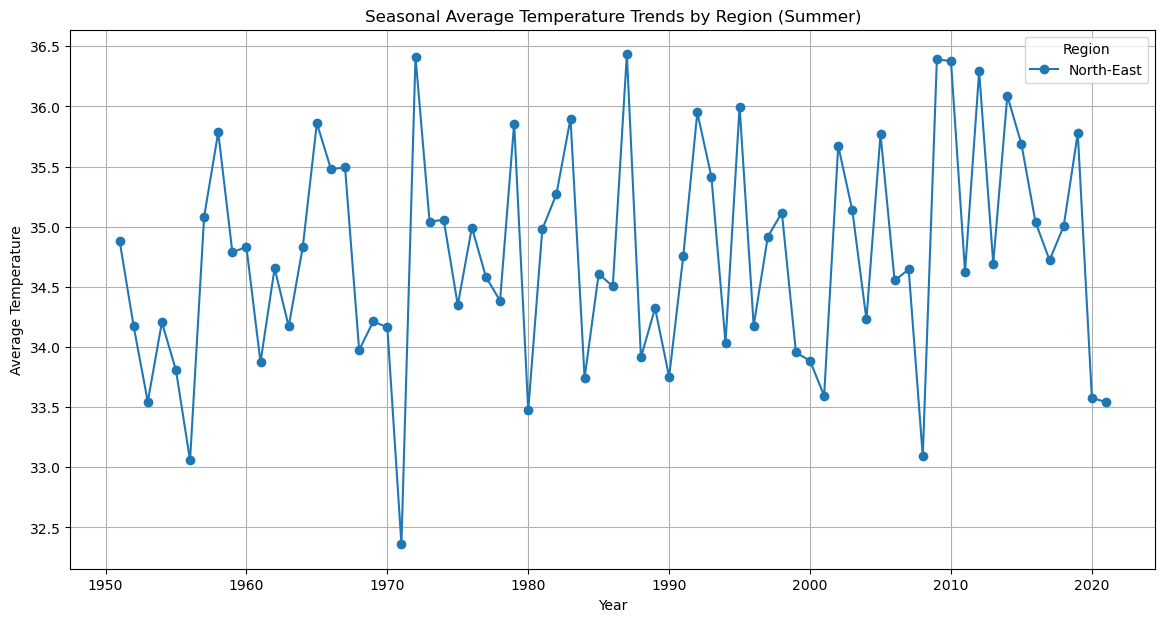

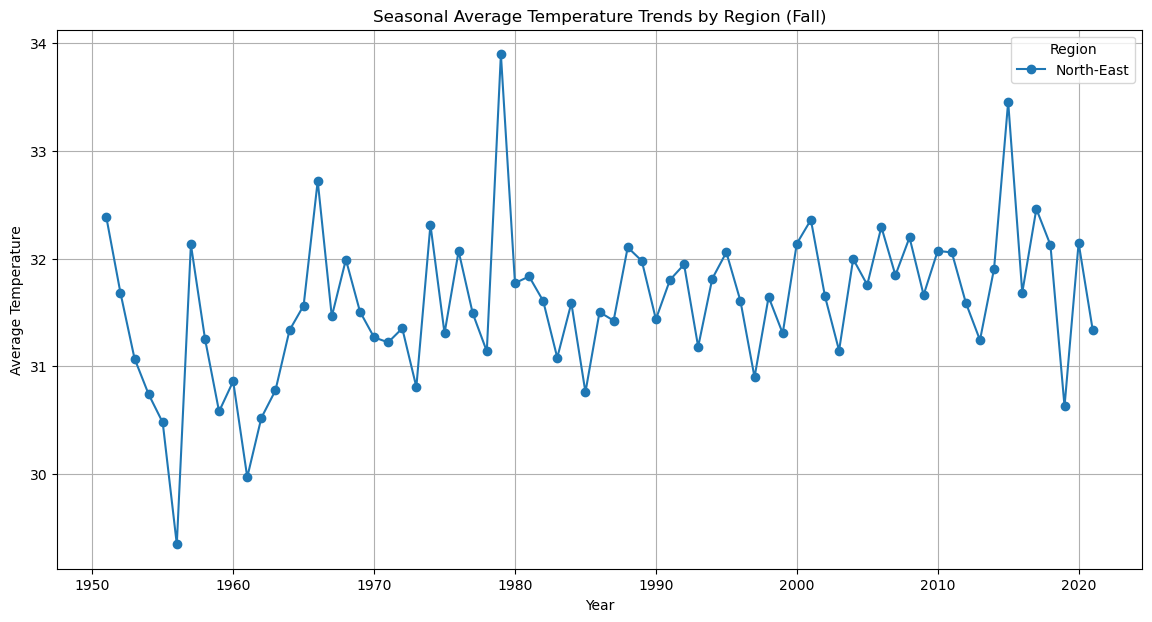

In [17]:
import matplotlib.pyplot as plt

# Plotting the seasonal temperature trends for each region
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
regions = data['region'].unique()

for season in seasons:
    plt.figure(figsize=(14, 7))
    for region in regions:
        season_region_data = seasonal_avg_temp[(seasonal_avg_temp['season'] == season) & (seasonal_avg_temp['region'] == region)]
        plt.plot(season_region_data['year'], season_region_data['temp'], marker='o', linestyle='-', label=region)
    plt.xlabel('Year')
    plt.ylabel('Average Temperature')
    plt.title(f'Seasonal Average Temperature Trends by Region ({season})')
    plt.legend(title='Region')
    plt.grid(True)
    plt.show()


#Region

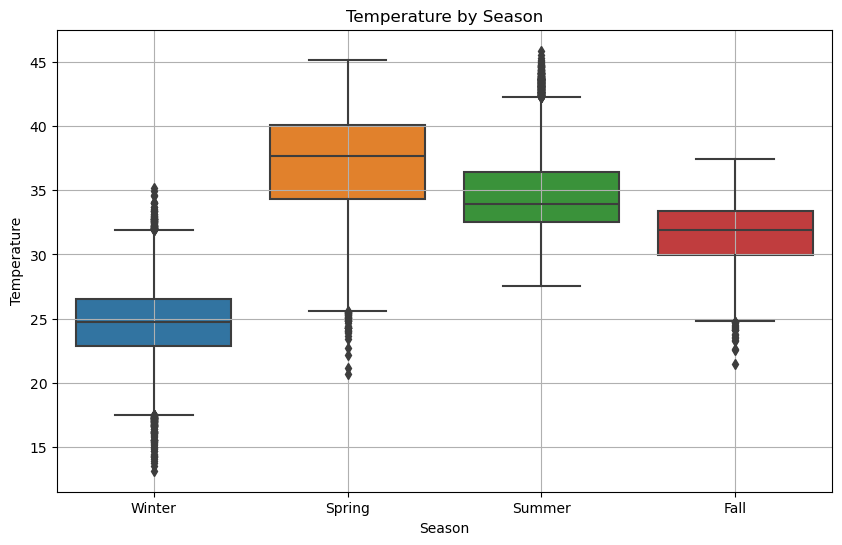

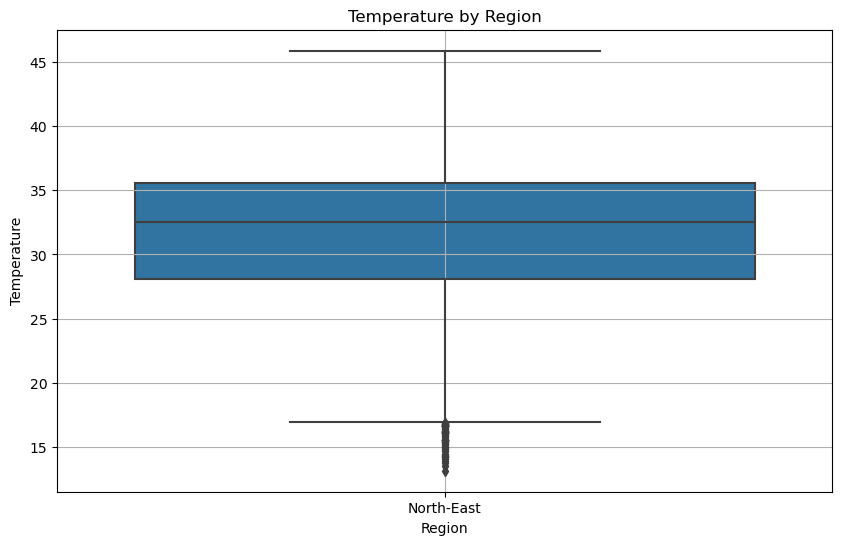

In [19]:
# Boxplot of temperatures by season
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='temp', data=data)
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.title('Temperature by Season')
plt.grid(True)
plt.show()

# Boxplot of temperatures by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='temp', data=data)
plt.xlabel('Region')
plt.ylabel('Temperature')
plt.title('Temperature by Region')
plt.grid(True)
plt.show()

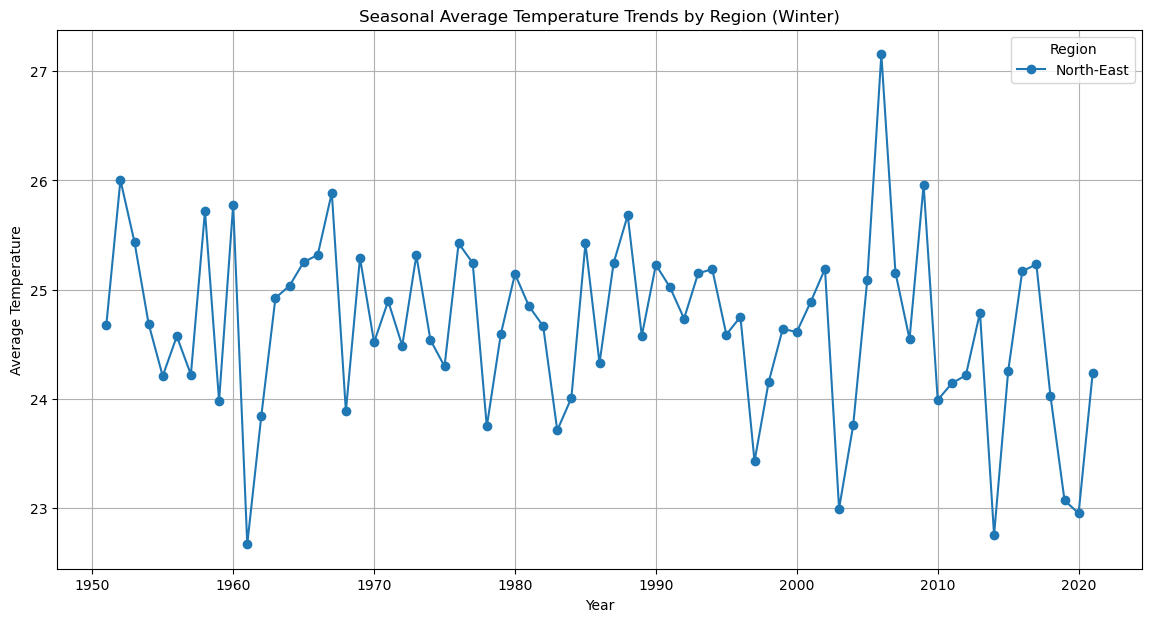

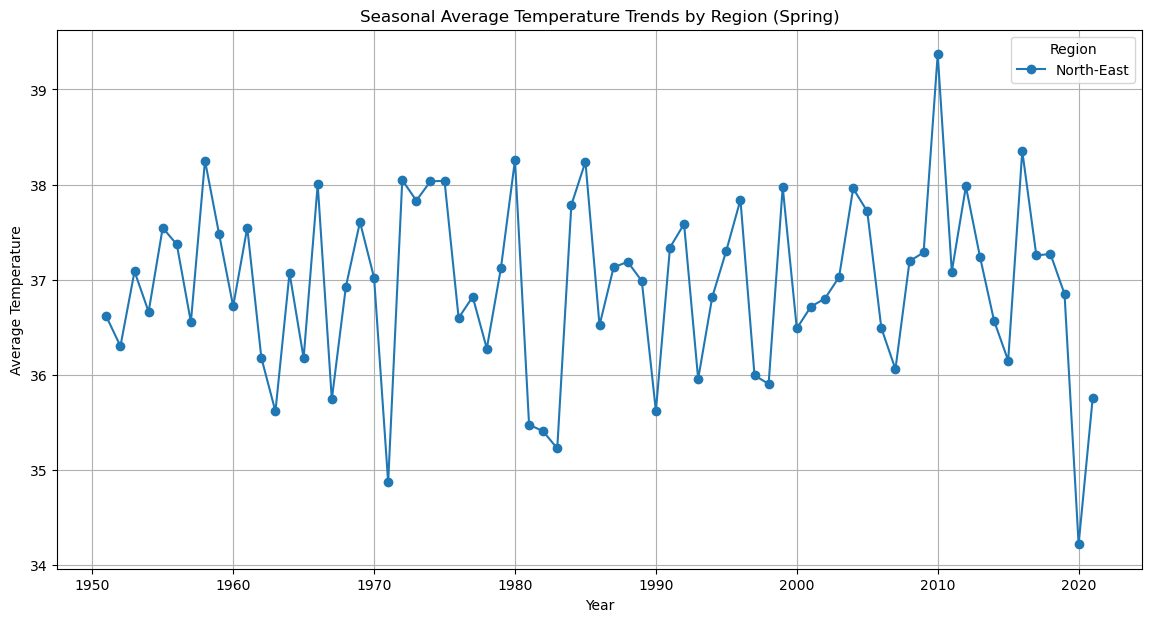

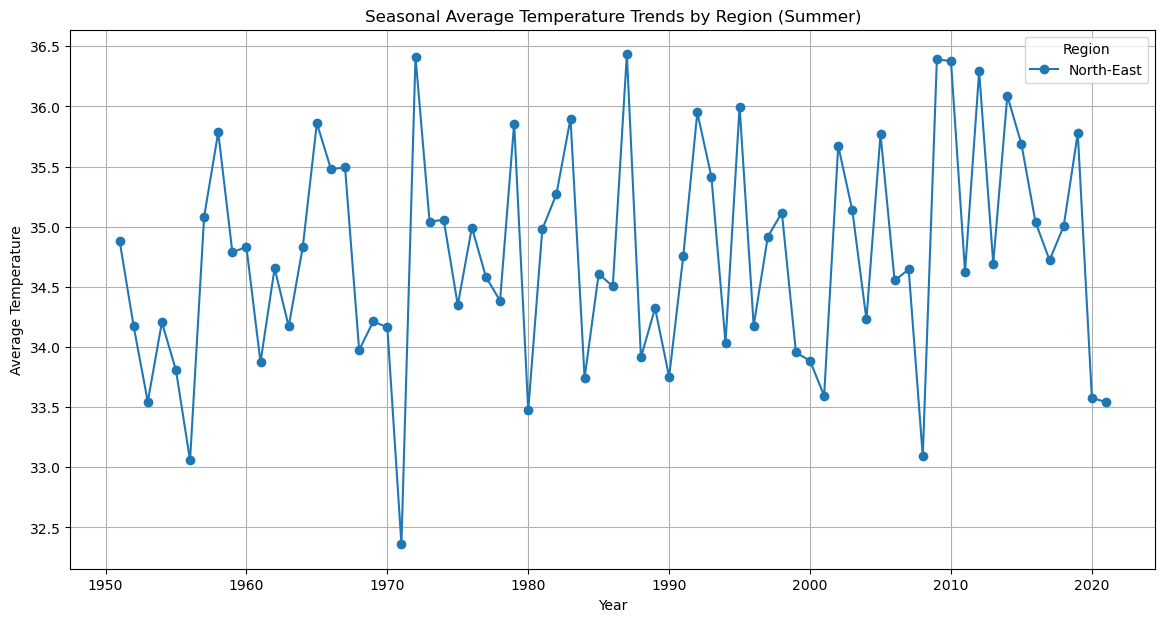

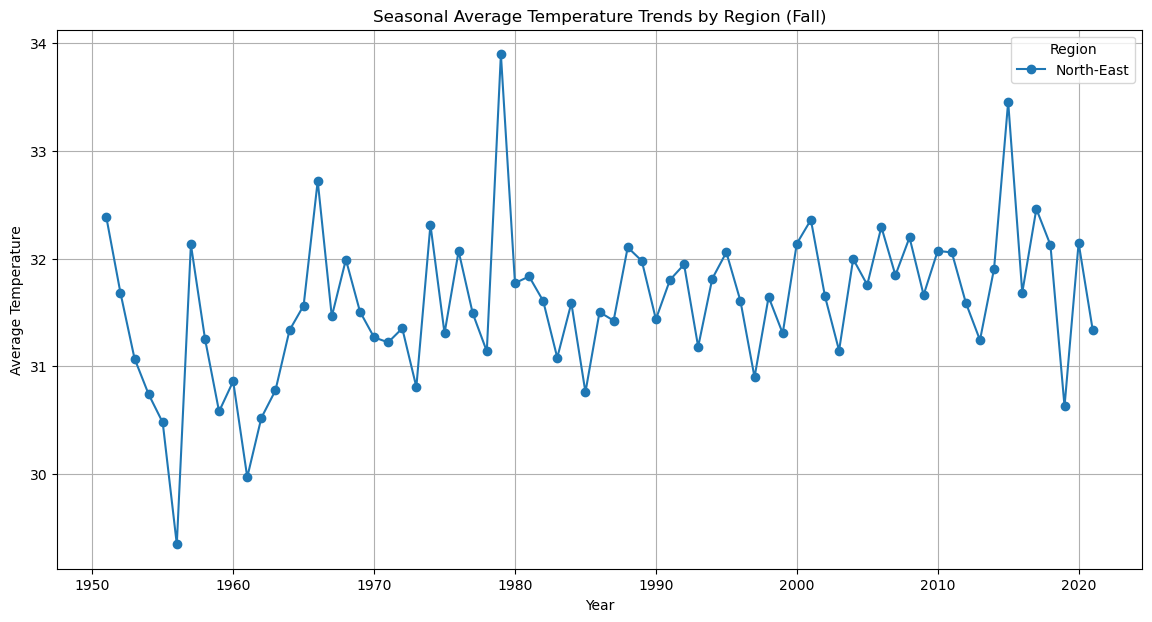

In [20]:
# Calculate seasonal average temperatures for each region
seasonal_avg_temp = data.groupby(['year', 'season', 'region'])['temp'].mean().reset_index()

# Plotting the seasonal temperature trends for each region
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
regions = data['region'].unique()

for season in seasons:
    plt.figure(figsize=(14, 7))
    for region in regions:
        season_region_data = seasonal_avg_temp[(seasonal_avg_temp['season'] == season) & (seasonal_avg_temp['region'] == region)]
        plt.plot(season_region_data['year'], season_region_data['temp'], marker='o', linestyle='-', label=region)
    plt.xlabel('Year')
    plt.ylabel('Average Temperature')
    plt.title(f'Seasonal Average Temperature Trends by Region ({season})')
    plt.legend(title='Region')
    plt.grid(True)
    plt.show()


Time series Analysis


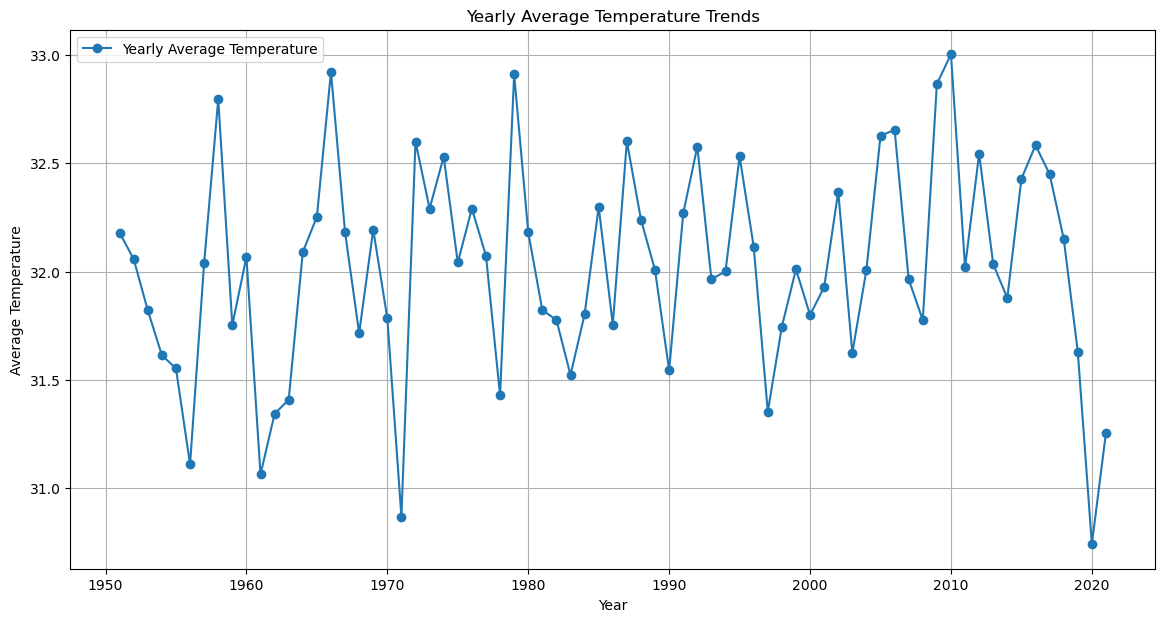

In [21]:
import matplotlib.pyplot as plt
# Calculate yearly average temperatures
yearly_avg_temp = data.groupby('year')['temp'].mean()

# Plotting the yearly average temperature trends
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_temp.index, yearly_avg_temp, marker='o', linestyle='-', label='Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Average Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from scipy.stats import f_oneway

# ANOVA to test differences in mean temperatures across regions
regions = data['region'].unique()
region_temps = [data[data['region'] == region]['temp'] for region in regions]

anova_result = f_oneway(*region_temps)
print(f"ANOVA result for regions: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


TypeError: at least two inputs are required; got 1.

In [23]:
# Check the number of unique regions
unique_regions = data['region'].unique()
print("Unique regions:", unique_regions)
print("Number of unique regions:", len(unique_regions))


Unique regions: ['North-East']
Number of unique regions: 1


C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


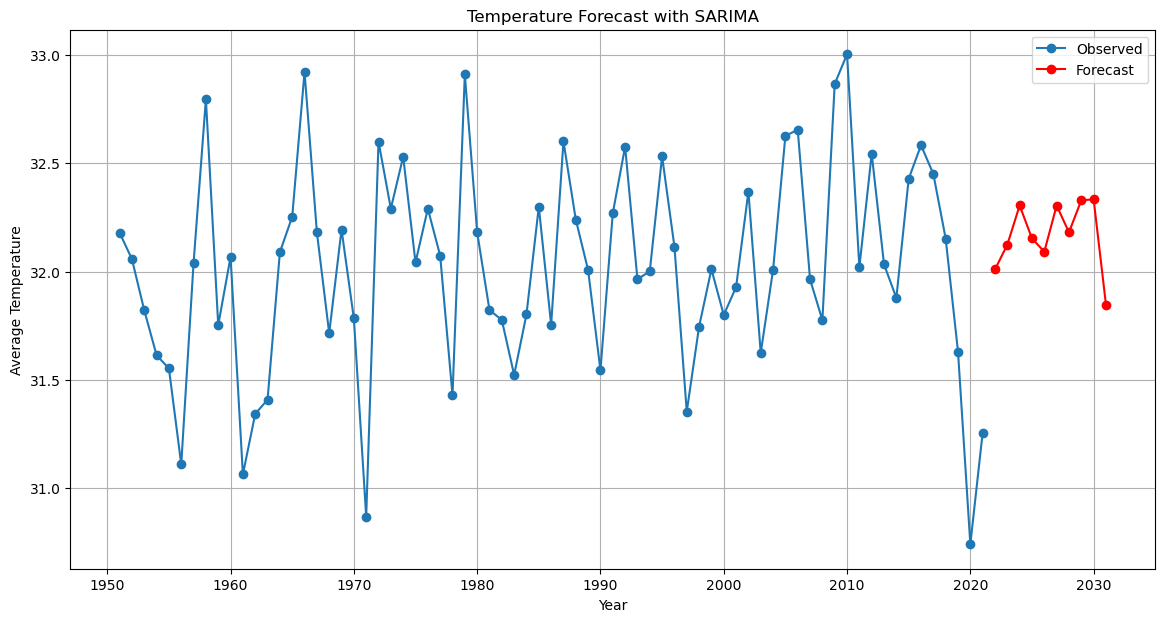

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model
model = SARIMAX(yearly_avg_temp, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast future temperatures
forecast = model_fit.get_forecast(steps=10)
forecast_values = forecast.predicted_mean

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_temp.index, yearly_avg_temp, marker='o', linestyle='-', label='Observed')
plt.plot(range(yearly_avg_temp.index[-1] + 1, yearly_avg_temp.index[-1] + 11), forecast_values, marker='o', linestyle='-', color='red', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature Forecast with SARIMA')
plt.legend()
plt.grid(True)
plt.show()
